In [3]:
# Basic imports
import os
import sys
sys.path.append("..")
from src.config import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preset Variables if needed:
RANDOM_STATE = 1
np.random.seed(RANDOM_STATE)

In [4]:
df = pd.read_csv(DATASET_PATH, dtype={"clip_id": str})
df["dataset_id"] = df["speaker_id"] + "_" + df["video_id"] + "_" + df["clip_id"]
df = df.set_index("dataset_id")
df = df.dropna()
df.head()

,speaker_id,face_id,gender,split,video_id,clip_id,batch,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,...,distance_16_08,distance_33_08,distance_00_27,distance_16_27,distance_04_08,distance_12_08,distance_60_64,distance_51_62,distance_57_66,distance_31_35
dataset_id,,,,,,,,,,,,,,,,,,,,,
id00012__raOc3-IRsw_00110,id00012,n000012,m,train,_raOc3-IRsw,00110,1,33.945885,0.199680,28.514013,...,1.471136,0.777449,1.146043,1.126334,0.874213,0.865317,0.494993,0.066802,0.064824,0.268284
id00012__raOc3-IRsw_00114,id00012,n000012,m,train,_raOc3-IRsw,00114,1,35.520040,0.186342,30.745964,...,1.494071,0.793853,1.152285,1.131379,0.868375,0.867039,0.477836,0.069779,0.068104,0.262190
id00012__raOc3-IRsw_00112,id00012,n000012,m,train,_raOc3-IRsw,00112,1,37.510630,0.200410,30.035390,...,1.479254,0.767715,1.150438,1.129916,0.870555,0.867771,0.492696,0.068896,0.070959,0.270061
id00012__raOc3-IRsw_00111,id00012,n000012,m,train,_raOc3-IRsw,00111,1,37.014935,0.244918,28.439920,...,1.470482,0.818316,1.120526,1.102237,0.852877,0.852429,0.452697,0.073236,0.073450,0.254945
id00012__raOc3-IRsw_00113,id00012,n000012,m,train,_raOc3-IRsw,00113,1,37.225666,0.215866,30.978403,...,1.472087,0.776903,1.148466,1.126694,0.872199,0.865459,0.500130,0.072282,0.072217,0.270821


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, id00012__raOc3-IRsw_00110 to id00080_xKOKZLEReGo_00259
Columns: 111 entries, speaker_id to distance_31_35
dtypes: float64(104), int64(1), object(6)
memory usage: 8.5+ MB


In [6]:
info_columns = [
    "speaker_id",
    "face_id",
    "gender",
    "split",
    "video_id",
    "clip_id",
    "batch"
]

test_speaker_ids = np.random.choice(df["speaker_id"], size=10)
test_mask = df["speaker_id"].isin(test_speaker_ids)
test_df = df[test_mask]
train_df = df[~test_mask]
test_df, train_df = test_df.drop(columns=info_columns), train_df.drop(columns=info_columns)
len(test_df), len(train_df)

(2951, 7048)

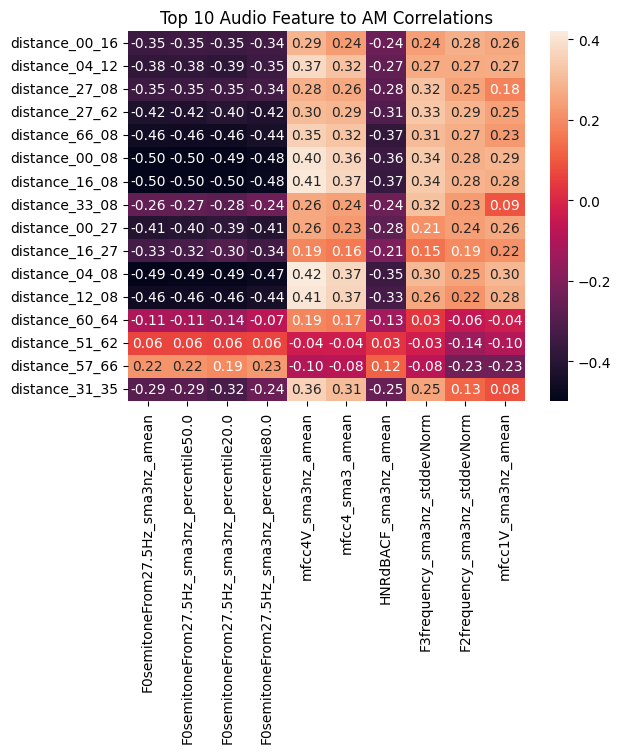

In [7]:
corr = df.drop(columns=info_columns).corr()
corr = corr[AM_COLUMN_NAMES].T.drop(columns=AM_COLUMN_NAMES)
top_10_corr = list(corr.abs().sum().nlargest(10).index)
corr = corr[top_10_corr]
sns.heatmap(corr,annot=True, fmt=".2f")
plt.title("Top 10 Audio Feature to AM Correlations")
plt.show()

In [8]:
y_column_names = AM_COLUMN_NAMES
y_test, y_train = test_df[y_column_names], train_df[y_column_names]
X_test, X_train = test_df.drop(columns=y_column_names), train_df.drop(columns=y_column_names)

In [9]:
AM_COLUMN_NAME = "distance_00_08"
y_test, y_train = y_test[AM_COLUMN_NAME], y_train[AM_COLUMN_NAME]

In [10]:
y_train.describe()

count    7048.000000
mean        1.436797
std         0.053122
min         1.273326
25%         1.399370
50%         1.438986
75%         1.476664
max         1.585149
Name: distance_00_08, dtype: float64

In [11]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [12]:
"""
param_grid = {
    "n_estimators": [100, 500, 1000, 2000],
    "max_depth": [3, 5, 7, 9]
}
"""
param_grid = {
    "n_estimators": [300],
    "max_depth": [4],
    "learning_rate": [0.01]
}

models = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=RANDOM_STATE),
    param_grid=param_grid,
    n_jobs=10,
    scoring='r2',
)
models.fit(X_train, y_train)
model = models.best_estimator_
models.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}

In [13]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

class AVG_MODEL:
    def __init__(self):
        self.mean_value = None
    
    def fit(self, X, y):
        self.mean_value = np.mean(y)
        return self
    
    def predict(self, X):
        if self.mean_value is None:
            raise ValueError("Model must be fitted before prediction")
        return np.full(X.shape[0], self.mean_value)

def evaluate_model(m_name: str, m):
    """Evaluate model performance on test data"""
    pred = m.predict(X_test)
    print(f"Evaluation for Model {m_name}:")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, pred):.4f}")
    print(f"Mean Squared Error : {mean_squared_error(y_test, pred):.4f}")
    print(f"R2 Score           : {r2_score(y_test, pred):.4f}")

In [14]:
avg_model = AVG_MODEL().fit(X_train, y_train)
evaluate_model("AVG_Model", avg_model)

Evaluation for Model AVG_Model:
Mean Absolute Error: 0.0325
Mean Squared Error : 0.0016
R2 Score           : -0.0851


In [15]:
evaluate_model("GradientBoostingRegressor", model)

Evaluation for Model GradientBoostingRegressor:
Mean Absolute Error: 0.0317
Mean Squared Error : 0.0016
R2 Score           : -0.0841


In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)

evaluate_model("Lasso", lasso)

Evaluation for Model Lasso:
Mean Absolute Error: 0.0322
Mean Squared Error : 0.0016
R2 Score           : -0.0911


In [17]:
import shap

/home/chr1s/.conda/envs/acoustic-to-anthropometric/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/tmp/ipykernel_19768/784322118.py:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


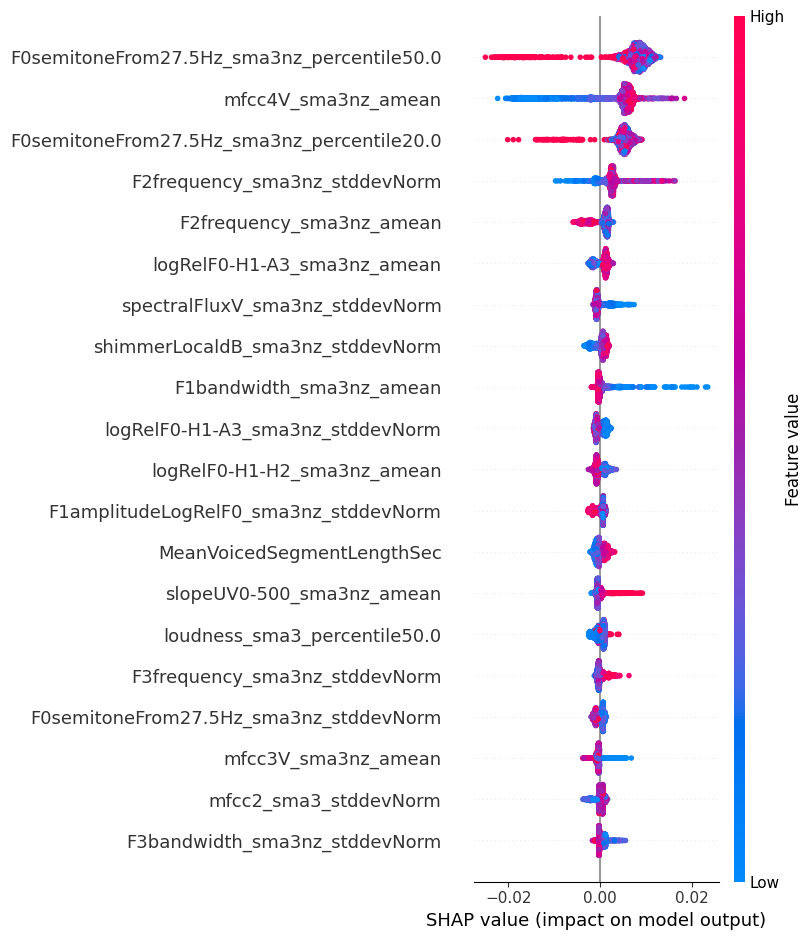

In [18]:
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)